###Checking if the tif file is georeferenced

In [ ]:
from osgeo import gdal

# Open the uploaded file to check if it is georeferenced
dataset = gdal.Open("51.tif")

# Function to check if the file is georeferenced
def is_georeferenced(dataset):
    geotransform = dataset.GetGeoTransform()
    if geotransform and geotransform != (0,1,0,0,0,1):
        return True, geotransform
    else:
        return False, None

# Check if the uploaded file is georeferenced
georeferenced, geotransform = is_georeferenced(dataset)

georeferenced, geotransform


(True, (289117.42217208975, 10.0, 0.0, 1203429.3634655103, 0.0, -10.0))

###Checking masking

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


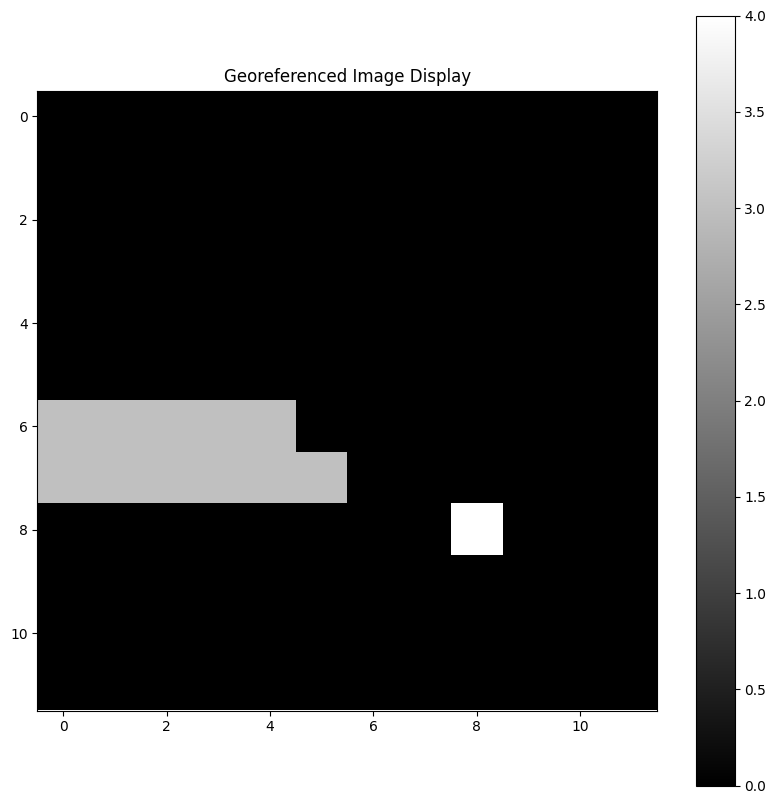

In [ ]:
band = dataset.GetRasterBand(1)
#GetRasterBand
import matplotlib.pyplot as plt

# Read the data into numpy array
raster_data = band.ReadAsArray()
print(raster_data)
# Plotting the data using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='gray')  # Change cmap as needed
plt.colorbar()
plt.title("Georeferenced Image Display")
plt.show()

In [ ]:
pip install folium


###Plotting location of tiff files


In [ ]:
from osgeo import gdal
from pyproj import Proj, transform
import folium

# Define the paths to your TIFF files
tiff_files = ["67.tif", "44.tif"]

# Define the original and target CRS
original_crs = Proj(init='epsg:32644')
target_crs = Proj(init='epsg:4326')  # WGS 84

# Function to convert coordinates
def convert_coords(x, y, geotransform, original_crs, target_crs):
    geo_x = geotransform[0] + geotransform[1] * x + geotransform[2] * y
    geo_y = geotransform[3] + geotransform[4] * x + geotransform[5] * y
    lon, lat = transform(original_crs, target_crs, geo_x, geo_y)
    return lon, lat

# Initialize a list to hold corner coordinates for all files
all_converted_corners = []

# Process each TIFF file
for tiff_path in tiff_files:
    dataset = gdal.Open(tiff_path)
    geotransform = dataset.GetGeoTransform()
    width = dataset.RasterXSize
    height = dataset.RasterYSize

    # Corners of the image in pixel coordinates
    corners = [
        (0, 0),  # Top left
        (width, 0),  # Top right
        (0, height),  # Bottom left
        (width, height)  # Bottom right
    ]

    # Convert corners and store
    converted_corners = [convert_coords(x, y, geotransform, original_crs, target_crs) for x, y in corners]
    all_converted_corners.extend(converted_corners)

# Calculate the map center from all corners
center_lon = sum(lon for lon, lat in all_converted_corners) / len(all_converted_corners)
center_lat = sum(lat for lon, lat in all_converted_corners) / len(all_converted_corners)

# Create a map centered around the calculated center
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add markers for the corners of each TIFF file
for lon, lat in all_converted_corners:
    folium.Marker([lat, lon]).add_to(m)

# Save the map to an HTML file
m


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-20-e2ab4a2a3995>:16: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(original_crs, target_crs, geo